<a href="https://colab.research.google.com/github/martiengli/Practica_Estadistica_3/blob/main/actividad_3_estadistica_avanzada_mer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [ ]:
data=pd.read_excel("/content/Clima_Anual.xlsx")
data

,Fecha,Num_dias_lluvia,Num_dias_nieve,Num_dias_granizo,Num_dias_niebla
0,2022,100.500,1.731,1.615,18.346
1,2021,107.000,3.958,2.125,22.583
2,2020,109.182,2.909,1.682,23.455
3,2019,95.083,2.125,2.417,17.875
4,2018,119.040,8.640,3.840,23.600
5,2017,84.522,3.783,2.000,18.217
6,2016,106.708,3.000,1.583,24.120
7,2015,92.292,4.667,2.167,24.640
8,2014,112.917,3.750,2.542,19.708
9,2013,110.333,6.875,3.583,19.292


# Procesamiento de los datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha             10 non-null     int64  
 1   Num_dias_lluvia   10 non-null     float64
 2   Num_dias_nieve    10 non-null     float64
 3   Num_dias_granizo  10 non-null     float64
 4   Num_dias_niebla   10 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Fecha,Num_dias_lluvia,Num_dias_nieve,Num_dias_granizo,Num_dias_niebla
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,2017.50000,103.757700,4.143800,2.355400,21.183600
std,3.02765,10.523272,2.134347,0.786186,2.730095
min,2013.00000,84.522000,1.731000,1.583000,17.875000
25%,2015.25000,96.437250,2.931750,1.761500,18.582500
50%,2017.50000,106.854000,3.766500,2.146000,21.145500
75%,2019.75000,110.045250,4.489750,2.510750,23.563750
max,2022.00000,119.040000,8.640000,3.840000,24.640000


In [ ]:
data.head()

,Fecha,Num_dias_lluvia,Num_dias_nieve,Num_dias_granizo,Num_dias_niebla
0,2022,100.500,1.731,1.615,18.346
1,2021,107.000,3.958,2.125,22.583
2,2020,109.182,2.909,1.682,23.455
3,2019,95.083,2.125,2.417,17.875
4,2018,119.040,8.640,3.840,23.600


# 1- Estimación de Funciones de Densidad de Probabilidad:

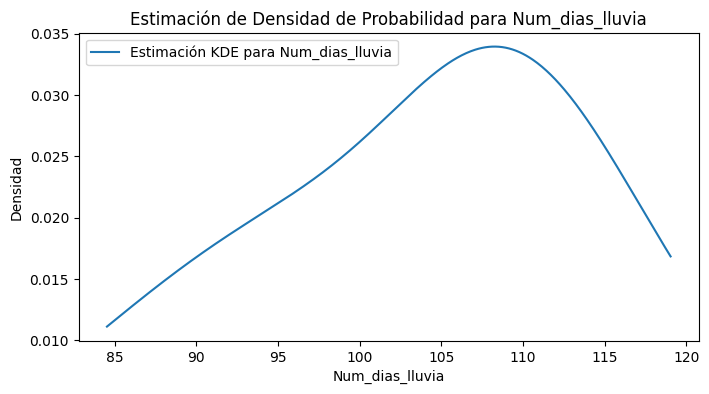

In [ ]:
from scipy.stats import gaussian_kde

kde_lluvia = gaussian_kde(time_series_data)

# Rango de valores sobre los cuales evaluar la función de densidad
valores_min_lluvia = time_series_data.min()
valores_max_lluvia = time_series_data.max()
x_lluvia = np.linspace(valores_min_lluvia, valores_max_lluvia, 500)

# Calcular la densidad en esos valores
densidad_lluvia = kde_lluvia(x_lluvia)

# Visualización
plt.figure(figsize=(8, 4))
plt.plot(x_lluvia, densidad_lluvia, label='Estimación KDE para Num_dias_lluvia')
plt.title('Estimación de Densidad de Probabilidad para Num_dias_lluvia')
plt.xlabel('Num_dias_lluvia')
plt.ylabel('Densidad')
plt.legend()
plt.show()



**Interpretación del Gráfico:**
1. Curva de Densidad: La curva representa la estimación de la densidad de probabilidad de los días de lluvia. Muestra cómo se distribuyen los valores del número de días de lluvia en el conjunto de datos.

2. Picos y Valles: Cualquier pico en la curva indica un valor (o valores) donde hay una mayor concentración de días de lluvia. Los valles, o puntos bajos, indican valores menos comunes.

3. Forma de la Curva: La forma de la curva te da una idea de la distribución general de los días de lluvia. Por ejemplo, una curva simétrica sugeriría una distribución uniforme alrededor de un valor central, mientras que una curva asimétrica podría indicar un sesgo hacia más o menos días de lluvia.

4. Ancho de la Curva: El ancho de la curva puede darte una idea de la variabilidad en el número de días de lluvia. Una curva más ancha sugiere una mayor variabilidad, mientras que una curva más estrecha sugiere que los valores están más concentrados alrededor de la media.

# 2- Análisis de Series Temporales

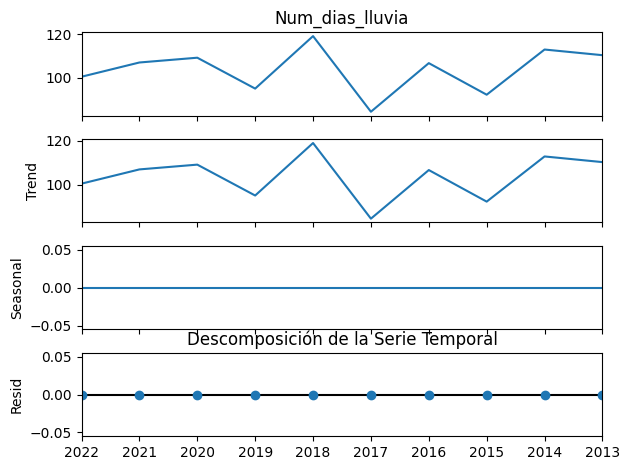

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


time_series_data = data.set_index('Fecha')['Num_dias_lluvia']


# Descomposición de la serie temporal para visualizar tendencia y estacionalidad
# Nota: la estacionalidad puede no ser significativa en datos anuales
decomposition = sm.tsa.seasonal_decompose(time_series_data, model='additive', period=1)
fig = decomposition.plot()
plt.title('Descomposición de la Serie Temporal')
plt.show()


### Ajuste del modelo

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Función para ajustar y evaluar un modelo ARIMA
def ajustar_evaluar_arima(datos, order):
    # Dividir los datos en entrenamiento y prueba
    n = len(datos)
    train = datos.iloc[:int(n * 0.8)]
    test = datos.iloc[int(n * 0.2):]

    # Ajustar el modelo ARIMA
    modelo = ARIMA(train, order=order)
    modelo_fit = modelo.fit()

    # Predicciones
    predicciones = modelo_fit.forecast(steps=len(test))

    # Evaluar el modelo
    error = mean_squared_error(test, predicciones)
    return error, predicciones

# Probar diferentes combinaciones de p, d, q
resultados = {}
for p in range(5):
    for d in range(5):
        for q in range(5):
            try:
                error, _ = ajustar_evaluar_arima(time_series_data, order=(p, d, q))
                resultados[(p, d, q)] = error
            except:
                continue

# Encontrar la mejor combinación
mejor_order = min(resultados, key=resultados.get)
mejor_error = resultados[mejor_order]

mejor_order, mejor_error



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

((1, 0, 1), 79.85568304015325)

### Predicciones

In [ ]:
# Preparando el modelo SARIMA
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html
modelo_sarima = sm.tsa.statespace.SARIMAX(time_series_data, order=(1, 0, 1), seasonal_order=(1,1,1,4))
results_sarima = modelo_sarima.fit()

# Predicciones (últimos 5 años para ejemplo)
predicciones_sarima = results_sarima.predict(start=time_series_data.index[-1], end=time_series_data.index[-10], dynamic=False)
predicciones_sarima

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations 

2013     98.513595
2014    106.531274
2015     94.729191
2016    111.868627
2017     98.513595
2018    106.531274
2019     94.729191
2020    111.868627
2021     98.513595
2022    106.531274
Name: predicted_mean, dtype: float64

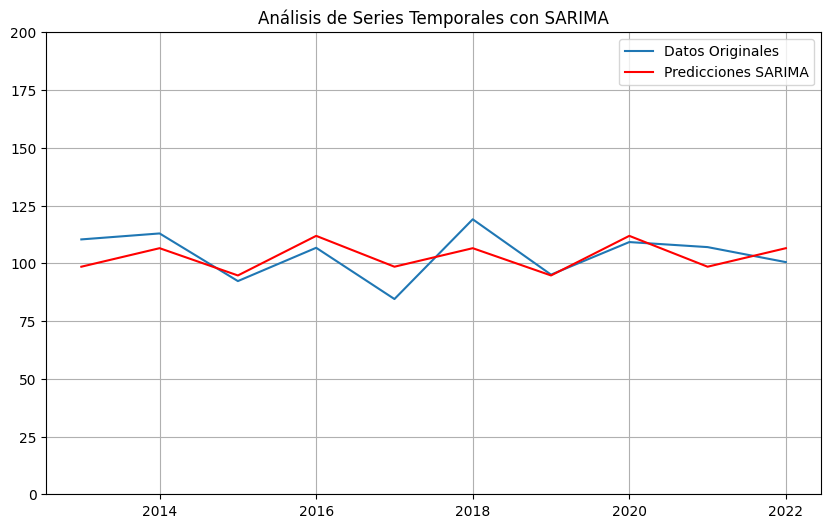

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label='Datos Originales')
plt.plot(predicciones_sarima, label='Predicciones SARIMA', color='red')
plt.legend()
plt.title('Análisis de Series Temporales con SARIMA')
plt.ylim([0,200])
plt.grid()
plt.show()

# 3- Modelos Gráficos Probabilísticos (Red Bayesiana)


La elección de utilizar una Red Bayesiana para analizar la relación entre diferentes fenómenos meteorológico como los días de lluvia, nieve, granizo y niebla, se basa en varios aspectos:

1. Dependencias Condicionales: Las Redes Bayesianas son particularmente eficaces para modelar dependencias condicionales entre variables.

2. Captura de Relaciones Causales: Este tipo de modelo es adecuado para capturar relaciones causales o influencias directas.

3. Inferencia Bajo Incertidumbre: Estos modelos son robustos para trabajar con incertidumbre

